In [12]:
%load_ext autoreload
%autoreload 2

from setup_imports import *  # noqa: F401,F403
from IPython.display import display
from src.phrases.phrase_model import Phrase

from src.phrases.search import get_phrases_by_collection
from src.utils import load_text_file

COLLECTION = "LM2000"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
phrases = load_text_file(f"../data/generated_phrases_test.txt")

In [ ]:
ALL_PHRASES = []
for phrase in phrases:
    p = Phrase.create(phrase)
    p.collections.append(COLLECTION)
    p.generate_image(overwrite=True)
    p.translate("sv-SE")
    p.generate_audio(context="flashcard", language="sv-SE")
    p.upload()
    ALL_PHRASES.append(p)


✅ Authenticated with Google Cloud project: swedish-course
✅ Natural Language API client initialized
🎨 Starting image generation process
   Prompt: A woman standing triumphantly at the top of a mountain, arms raised in celebration, with a trail of completed goals and achievements visible behind her on the path she climbed in the style of picture book illustration style, thick brushstrokes, colored pencil texture, expressive character faces, bold black outlines, textured cross-hatch shading, warm pastel color palette, whimsical cartoon proportions, soft watercolor-like backgrounds
   Will try providers in order: ['imagen', 'stability', 'deepai']
🔄 Attempting image generation with imagen...


In [3]:
phrases = get_phrases_by_collection(COLLECTION)

✅ Authenticated with Google Cloud project: swedish-course


E0000 00:00:1765744919.076072    2553 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.


🎨 Starting image generation process
   Prompt: A woman standing triumphantly at the top of a podium with a gold medal around her neck, holding a trophy high above her head, surrounded by confetti, her face beaming with pride and accomplishment in the style of picture book illustration style, thick brushstrokes, colored pencil texture, expressive character faces, bold black outlines, textured cross-hatch shading, warm pastel color palette, whimsical cartoon proportions, soft watercolor-like backgrounds
   Will try providers in order: ['imagen', 'stability', 'deepai']
🔄 Attempting image generation with imagen...


/root/mycode/audio-language-trainer/.venv/lib/python3.12/site-packages/vertexai/_model_garden/_model_garden_models.py:278: UserWarning: This feature is deprecated as of June 24, 2025 and will be removed on June 24, 2026. For details, see https://cloud.google.com/vertex-ai/generative-ai/docs/deprecations/genai-vertexai-sdk.
  warning_logs.show_deprecation_warning()
E0000 00:00:1765745673.378155    2553 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.
E0000 00:00:1765745674.019073    2553 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.
E0000 00:00:1765745674.022809    2553 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.


✅ Successfully generated image with imagen
✅ Generated image for en-GB
She achieves great results


/root/mycode/audio-language-trainer/.venv/lib/python3.12/site-packages/vertexai/vision_models/_vision_models.py:1436: UserWarning: This feature is deprecated as of June 24, 2025 and will be removed on June 24, 2026. For details, see https://cloud.google.com/vertex-ai/generative-ai/docs/deprecations/genai-vertexai-sdk.
  warning_logs.show_deprecation_warning()
/root/mycode/audio-language-trainer/.venv/lib/python3.12/site-packages/vertexai/vision_models/_vision_models.py:153: UserWarning: This feature is deprecated as of June 24, 2025 and will be removed on June 24, 2026. For details, see https://cloud.google.com/vertex-ai/generative-ai/docs/deprecations/genai-vertexai-sdk.
  warning_logs.show_deprecation_warning()


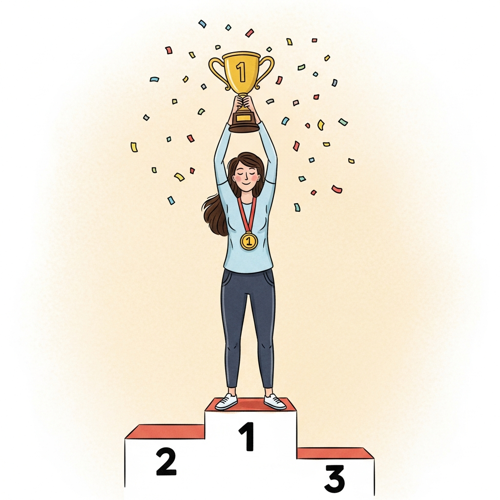

🎨 Starting image generation process
   Prompt: A team of diverse people standing at the summit of a mountain with arms raised triumphantly, their faces showing joy and accomplishment, with a flag planted at the peak in the style of picture book illustration style, thick brushstrokes, colored pencil texture, expressive character faces, bold black outlines, textured cross-hatch shading, warm pastel color palette, whimsical cartoon proportions, soft watercolor-like backgrounds
   Will try providers in order: ['imagen', 'stability', 'deepai']
🔄 Attempting image generation with imagen...


/root/mycode/audio-language-trainer/.venv/lib/python3.12/site-packages/vertexai/_model_garden/_model_garden_models.py:278: UserWarning: This feature is deprecated as of June 24, 2025 and will be removed on June 24, 2026. For details, see https://cloud.google.com/vertex-ai/generative-ai/docs/deprecations/genai-vertexai-sdk.
  warning_logs.show_deprecation_warning()
E0000 00:00:1765745681.929398    2553 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.
E0000 00:00:1765745682.459902    2553 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.
E0000 00:00:1765745682.460539    2553 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.


✅ Successfully generated image with imagen
✅ Generated image for en-GB
We achieved our goal


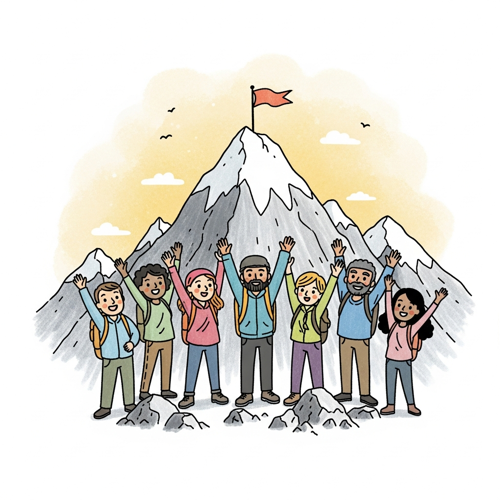

🎨 Starting image generation process
   Prompt: A determined person standing at the base of a mountain, looking up at a golden trophy or medal at the summit, with one foot already on the path and a thoughtful, questioning expression on their face in the style of picture book illustration style, thick brushstrokes, colored pencil texture, expressive character faces, bold black outlines, textured cross-hatch shading, warm pastel color palette, whimsical cartoon proportions, soft watercolor-like backgrounds
   Will try providers in order: ['imagen', 'stability', 'deepai']
🔄 Attempting image generation with imagen...


E0000 00:00:1765745690.369416    2553 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.
E0000 00:00:1765745690.906883    2553 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.
E0000 00:00:1765745690.907667    2553 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.


✅ Successfully generated image with imagen
✅ Generated image for en-GB
Will you achieve success?


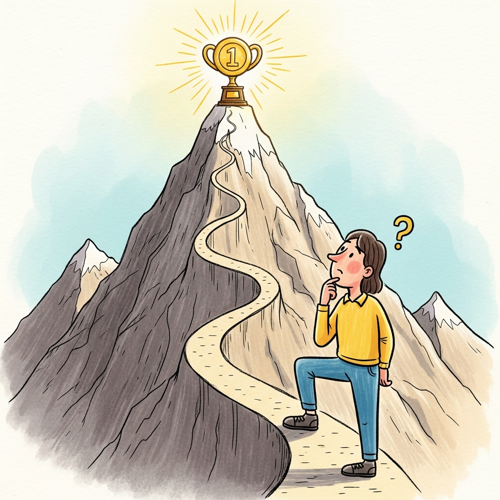

In [16]:
for phrase in phrases:
    phrase.generate_image(overwrite=True)
    print(phrase.english)   
    display(phrase.get_image())

In [17]:
for p in phrases:
    p.upload(overwrite=True)

Uploading phrase she_achieves_great_results_f55548 with all translations to Firestore and GCS
Uploading all multimedia for en-GB translation
Uploading image: en-GB to phrases/en-GB/images/she_achieves_great_results_f55548.png (local cache enabled)
Uploading all multimedia for sv-SE translation
Uploading phrase we_achieved_our_goal_8e4bfb with all translations to Firestore and GCS
Uploading all multimedia for en-GB translation
Uploading image: en-GB to phrases/en-GB/images/we_achieved_our_goal_8e4bfb.png (local cache enabled)
Uploading all multimedia for sv-SE translation
Uploading phrase will_you_achieve_success_6407e2 with all translations to Firestore and GCS
Uploading all multimedia for en-GB translation
Uploading image: en-GB to phrases/en-GB/images/will_you_achieve_success_6407e2.png (local cache enabled)
Uploading all multimedia for sv-SE translation


In [18]:
phrases[0].get_audio(language="sv-SE")